In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128

train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(33, 33),
    color_mode='grayscale',
    batch_size=batch_size,
    classes=['click','five', 'four', 'hold', 'mouse', 'phone', 'slider','three','two','volume'],
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    'dataset/test/',
    target_size=(33, 33),
    color_mode='grayscale',
    batch_size=batch_size,
    classes=['click','five', 'four', 'hold', 'mouse', 'phone', 'slider','three','two','volume'],
    class_mode='categorical'
)

Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


Text(0.5, 0, 'Class')

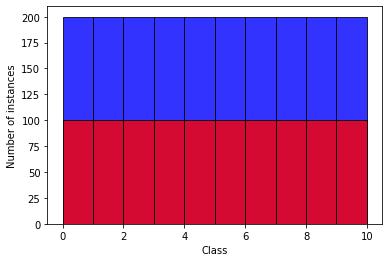

In [3]:
h1, _, _ = plt.hist(
    train_gen.classes, 
    bins=range(11), 
    alpha=.8, 
    color='blue', 
    edgecolor='black'
)
h2, _, _ = plt.hist(
    test_gen.classes, 
    bins=range(11), 
    alpha=.8, 
    color='red', 
    edgecolor='black'
)
plt.ylabel('Number of instances')
plt.xlabel('Class')

(128, 33, 33, 1) (128, 10)


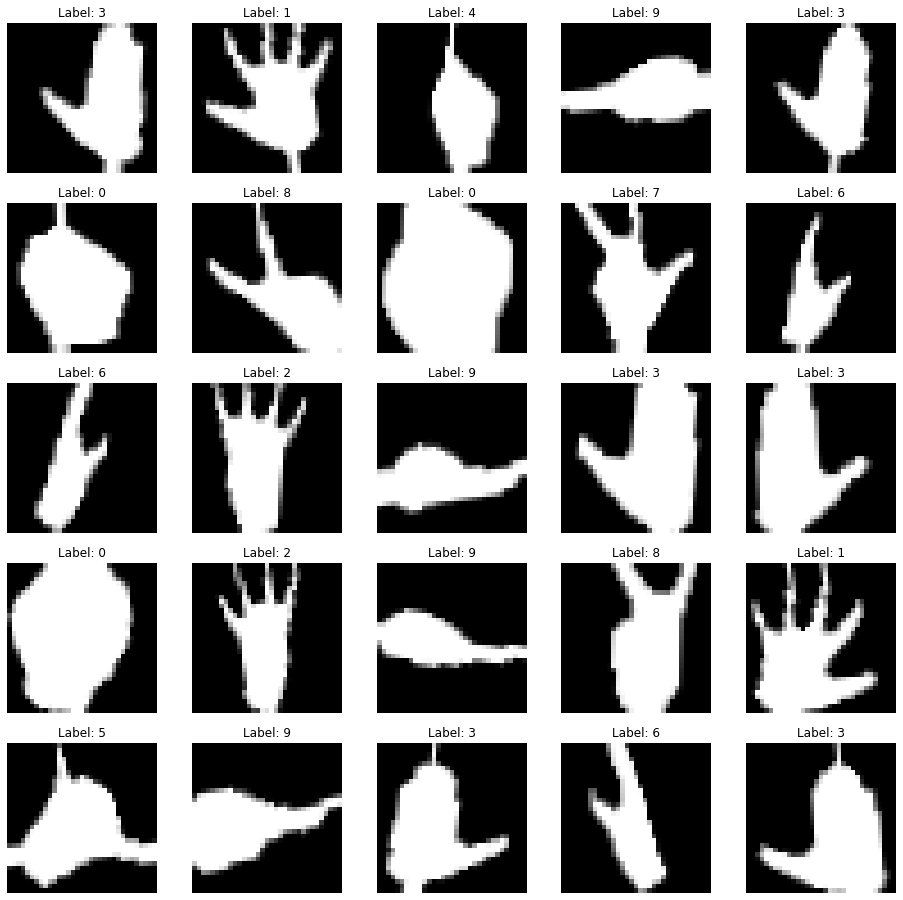

In [4]:
X, y = train_gen.next()
print(X.shape, y.shape)

plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.title('Label: %d' % np.argmax(y[i]))
    img = np.uint8(255*X[i, :, :, 0])
    plt.imshow(img, cmap='gray')

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(33, 33, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)      

In [6]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5')
]

In [8]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=120,
    epochs=40,
    validation_data=test_gen,
    validation_steps=28,
    callbacks=callbacks
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
120/120 [==============================] - 53s 444ms/step - loss: 1.0398 - acc: 0.6502 - val_loss: 0.1518 - val_acc: 0.9450
Epoch 2/40
120/120 [==============================] - 57s 471ms/step - loss: 0.3153 - acc: 0.8974 - val_loss: 0.0798 - val_acc: 0.9690
Epoch 3/40
120/120 [==============================] - 56s 468ms/step - loss: 0.1869 - acc: 0.9378 - val_loss: 0.1062 - val_acc: 0.9618
Epoch 4/40
120/120 [==============================] - 55s 462ms/step - loss: 0.1400 - acc: 0.9548 - val_loss: 0.0573 - val_acc: 0.9759
Epoch 5/40
120/120 [==============================] - 56s 468ms/step - loss: 0.1012 - acc: 0.9676 - val_loss: 0.0653 - val_acc: 0.9721
Epoch 6/40
120/120 [==============================] - 55s 457ms/step - loss: 0.0987 - acc: 0.9684 - val_loss: 0.0587 - val_acc: 0.9808
Epoch 7/40
120/120 [==============================] - 55s 459ms/step - loss: 0.0815 - acc: 0.9744 - val_loss: 0.0590 - val_acc: 0.9829
Epoch 8

Text(0.5, 0, 'Epochs')

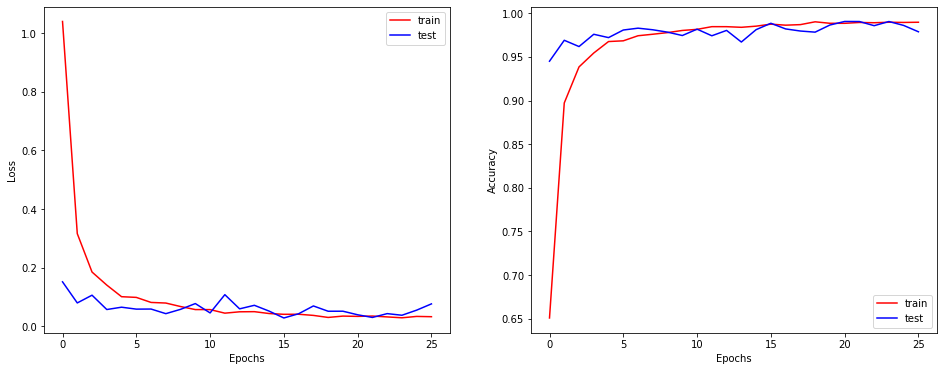

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_loss'], 'b-', label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['acc'], 'r-', label='train')
plt.plot(range(epochs), history.history['val_acc'], 'b-', label='test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [10]:
model.save("model_1.h5")

In [11]:
import cv2
test = cv2.imread('./dataset/test/three/207.png',cv2.IMREAD_GRAYSCALE)

In [12]:
test = np.expand_dims(test, axis = -1)

In [13]:
test = np.expand_dims(test, axis=0)


In [14]:
test.shape

(1, 33, 33, 1)

In [15]:
from keras.models import load_model
model = load_model("model_1.h5")

In [16]:
print(model.predict(test))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [17]:
np.argmax(pred[0])

NameError: name 'pred' is not defined